<a href="https://colab.research.google.com/github/shmanth/Virat_Kohli_Cricket_Data_visualisation_q-a_IIITB/blob/master/Practice_Exercise_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### I - Virat Kohli Dataset

In [75]:
#reading the data
df = pd.read_csv("/content/drive/MyDrive/Virat_Cricket_qa/virat.csv")

In [76]:
data_dict=pd.read_csv("/content/drive/MyDrive/Virat_Cricket_qa/Data+Dictionary-Cricket.csv")

In [77]:
df.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [78]:
# check the description of coulumn names
data_dict

,Column Name,Description
0,Runs,The number of runs scored by Virat in that par...
1,Mins,Total time taken by Virat to score the runs. E...
2,BF,Total number of balls faced by Virat to score ...
3,4s,Number of fours hit by Virat in that match
4,6s,Number of sixes hit by Virat in that match
5,SR,The strike rate of Virat in that match.
6,Pos,The batting position of Virat in that match.
7,Dismissal,The mode of dismissal in that match.
8,Inns,Denotes whether team batted first or batted se...
9,Opposition,The opposition country against which Virat pla...


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [80]:
df.Runs.value_counts()

0      10
2       5
12      4
37      4
1       4
       ..
77*     1
26      1
43      1
64      1
55      1
Name: Runs, Length: 83, dtype: int64

In [81]:
# Remove stars to convert to int
df.Runs= df.Runs.str.replace('*',"")

In [82]:
df.Runs.value_counts()

0      10
2       6
1       5
12      4
37      4
       ..
21      1
128     1
6       1
15      1
55      1
Name: Runs, Length: 75, dtype: int64

In [83]:
df.Runs= df.Runs.astype("int32")

In [84]:
df.Runs.dtype

dtype('int32')

#### Spread in Runs
Question 1: Analyse the spread of Runs scored by Virat in all his matches and report the difference between the scores at the 50th percentile and the 25th percentile respectively.

    a)16.5
    b)22.5
    c)26.5
    d)32.5



In [85]:
## Your code here
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

In [86]:
# calculating the difference between 50th and 25th
np.quantile(df.Runs,0.50)-np.quantile(df.Runs,0.25)

22.5

#### Box Plots

Question 2: Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

    a)100-120
    b)120-140
    c)140-160
    d)160-180


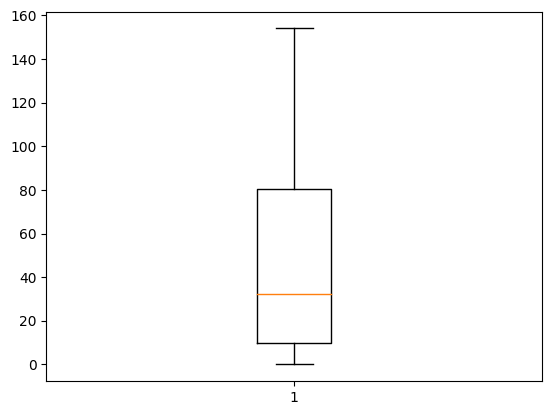

In [87]:
#Your code here
plt.boxplot(df["Runs"])
plt.show()

#### False Statement

Q3:Consider the following statements and choose the correct option

     I - Virat has played the maximum number of matches in 2011
     II - Virat has the highest run average in the year 2017
     III - Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

    a)I and II
    b)I and III
    c)II
    d)III



In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    int32 
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int32(1), int64(5), object(6)
memory usage: 12.0+ KB


In [89]:
## Your code here
df["year"]= pd.to_datetime(df["Start Date"]).dt.year

In [90]:
df.year.value_counts()

2011    31
2013    23
2014    17
2010    16
2012    11
2015    10
2016    10
2009     6
2008     5
2017     3
Name: year, dtype: int64

In [95]:
df.Runs.describe()

count    132.000000
mean      46.848485
std       41.994635
min        0.000000
25%       10.000000
50%       32.500000
75%       80.250000
max      154.000000
Name: Runs, dtype: float64

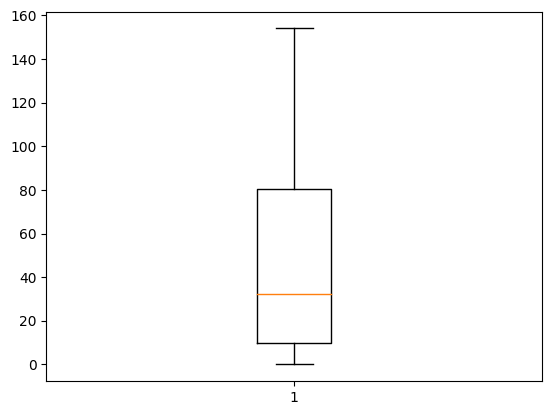

In [97]:
plt.boxplot(df["Runs"])
plt.show()

In [109]:
df.groupby("year")["Runs"].median()

year
2008    31.0
2009    28.5
2010    34.0
2011    28.0
2012    23.0
2013    37.0
2014    53.0
2015    11.5
2016    75.0
2017    55.0
Name: Runs, dtype: float64

In [101]:
df[df.Runs==df.Runs.max()]

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,year
126,154,202,134,16,1,114.92,3,not out,2,v New Zealand,Mohali,23-Oct-16,2016


In [110]:
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.mean)


Start Date,1-Dec-10,10-Dec-10,11-Dec-11,11-Jan-10,11-Jan-13,11-Jun-11,11-Oct-14,11-Oct-15,12-Feb-12,12-Jan-11,...,6-Sep-11,7-Dec-10,7-Jan-10,8-Dec-11,8-Dec-13,8-Jun-11,8-Oct-14,9-Mar-11,9-Nov-14,9-Sep-11
Runs,64,2,80,102,15,0,62,11,18,54,...,9,0,91,23,0,81,2,12,53,7


In [111]:
pd.pivot_table(df, values='Runs',columns=['Start Date'], aggfunc=np.max)

Start Date,1-Dec-10,10-Dec-10,11-Dec-11,11-Jan-10,11-Jan-13,11-Jun-11,11-Oct-14,11-Oct-15,12-Feb-12,12-Jan-11,...,6-Sep-11,7-Dec-10,7-Jan-10,8-Dec-11,8-Dec-13,8-Jun-11,8-Oct-14,9-Mar-11,9-Nov-14,9-Sep-11
Runs,64,2,80,102,15,0,62,11,18,54,...,9,0,91,23,0,81,2,12,53,7


#### Maximum Frequency

Q4:Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

    a)A - [54.6,68)
    b)B - [68,81.4)
    c)C - [121.6,135)
    d)All the bin ranges have the same frequency


In [113]:
df2 = df[~(df['Mins']== "-")]
df2['Mins'] = df2['Mins'].apply(lambda x: int(x))

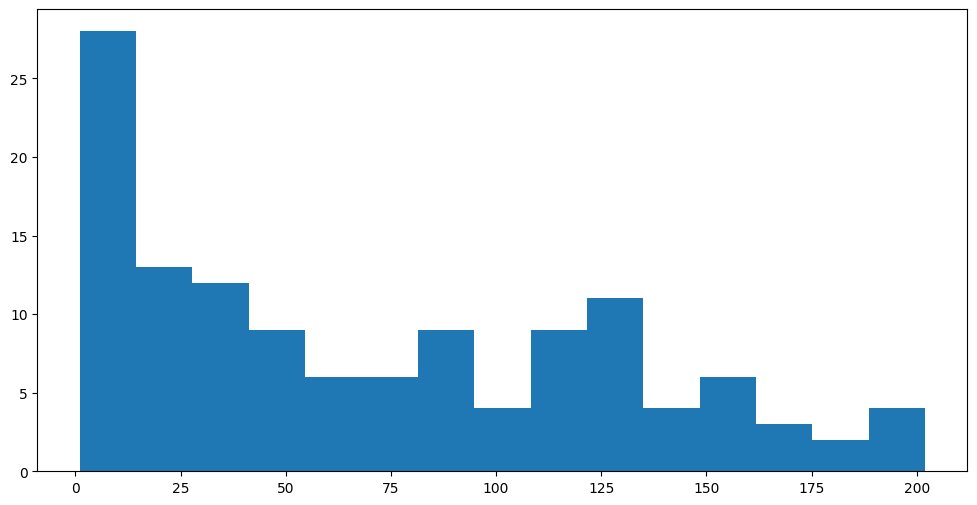

In [115]:
#Your code here
plt.figure(figsize=[12,6])
plt.hist(df2.Mins, bins=15)
plt.show()